In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

## CRPS data

### Clinical and Behavioral data

*d* is a dataframe containing clinical variables of "Age", "Gender", "Side", "Area", "Disease Duration", "Number of medications", BDI score, NSLQ score, Functional index score, Anxiety score, Depression score. They can be retireved form Kuttikat's thesis or provided by Christopher Brown. 
To the clinical variables one can concat the behavioral : average RT, accurracy score, d-prime and c-scores (calculated in a separate notebook. 

In [9]:
# retrieve the data
d = pd.read_excel("clin-behav.xlsx", sheet_name='CRPS')  

### Decoding performance

e_mean, m_mean,ml_mean, l_mean repectively contain the mean decoding performance in the early, mid, mid-late and late time windows, with patient id as index and columns for passive unaffected side ("p_unaff"), "p_aff", "a_unaff", "a_aff" and two columns "passive" and "active" containing the difference between hands (affected - unaffected) in the respective condition. 

In [8]:
# retrieve the data
e_mean = pd.read_csv("early.csv")
m_mean =  pd.read_csv("mid.csv")
ml_mean =  pd.read_csv("mid-late.csv")
l_mean = pd.read_csv("late.csv")

# concat to the clinical variables
e = pd.concat([e_mean, d], axis=1)
m = pd.concat([m_mean, d], axis=1)
ml = pd.concat([ml_mean, d], axis=1)
l = pd.concat([l_mean, d], axis=1)

### Plotting around

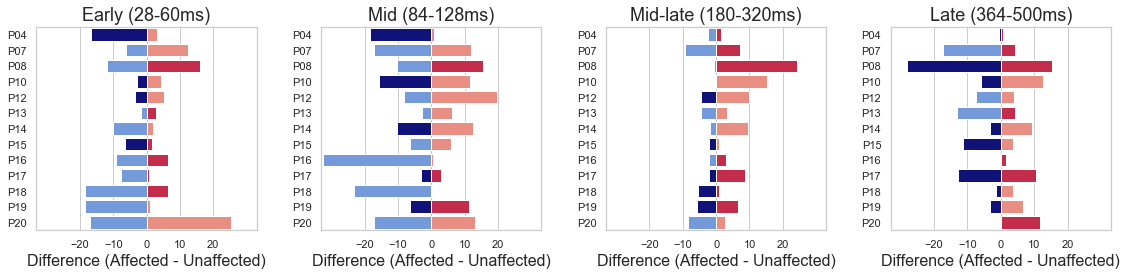

In [9]:
# this code produces Figure 4A in the CRPS attentional paper

sns.set(font_scale = 1.7, style="whitegrid")             # just some style settings
kwargs = {'alpha':0.5, 'linewidth':1, 'edgecolor':'k'}

means = [e, m, ml, l]
title = ['Early (28-60ms)', 'Mid (84-128ms)', 'Mid-late (180-320ms)', 'Late (364-500ms)']

f = plt.figure(figsize=(16, 6))
gs = f.add_gridspec(1, 4)

for i in range(4):
    
    ax1 = f.add_subplot(gs[0, i])
    
    p = means[i] #.sort_values(by=['passive'], ascending=False) if you want to order accordin to one of the values
    
    ax1 = sns.barplot(x = p['passive'], y= p.index, data=p, palette= ['blue'], **kwargs)  # passive data
    ax1 = sns.barplot(x = p['active'], y= p.index, data=p, palette= ['red'],**kwargs)  # active data drawn on top of it
    
    # more elaborate color palette: palette= ['cornflowerblue' if (x < 0.0) else 'darkblue' for x in p.passive ]
    # and palette= ['salmon' if (x < 0.0) else 'crimson' for x in p.active ]
    
    ax1.set_title(title[i], fontsize = 22)  
    ax1.set_xlabel('Affected - Unaffected', fontsize = 20)
    ax1.set_xlim(-45,45)
    ax1.set_xticks([-40,-20, 0, 20, 40])

f.tight_layout()

#f.savefig('CRPS decodability gap.png') # save the figure into an image

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


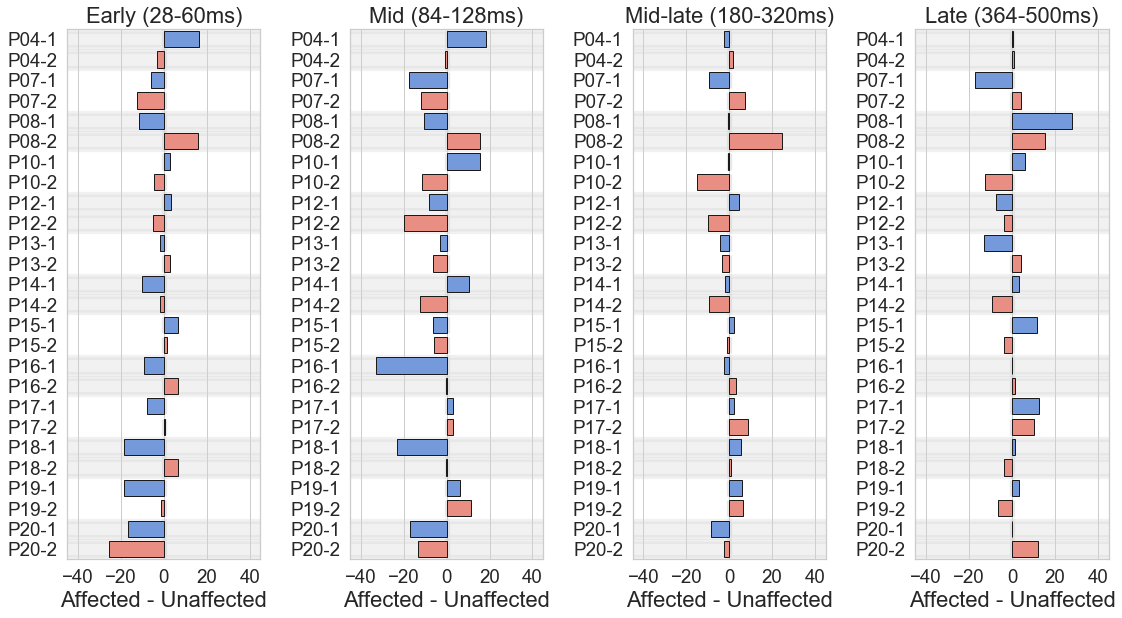

In [11]:
# this is an alternative to figure 4A, without ovelap. for each patients passive and then active decodability gap
# the other plot (above) is much easier to sort though

cond = [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1]
ids = ["P04-1","P07-1","P08-1","P10-1","P12-1","P13-1","P14-1","P15-1","P16-1","P17-1","P18-1","P19-1","P20-1",
       "P04-2","P07-2","P08-2","P10-2","P12-2","P13-2","P14-2","P15-2","P16-2","P17-2","P18-2","P19-2","P20-2"]
orig = [e_mean, m_mean, ml_mean, l_mean]
new = ['ek', 'mk', 'mlk', 'lk']

for i in range(4):
    k = pd.DataFrame()
    k['diff'] = list(pd.concat([orig[i]['passive'],orig[i]['active']]))
    k['cond'] = cond
    k['ids'] = ids
    k = k.sort_values(by=["ids", "cond"]).reset_index(drop=True)
    globals()['%s' %new[i]] = k.as_matrix()

backg = np.array([[50],[50],[0],[0],[50],[50],[0],[0],[50],[50],[0],[0],[50],[50],[0],[0],
                  [50],[50],[0],[0],[50],[50],[0],[0],[50],[50]]) # not very elegat way to separate the subjects with an
                                                                  # alternating grey and wite backgroud

newmeans = [ek, mk, mlk, lk]
title = ['Early (28-60ms)', 'Mid (84-128ms)', 'Mid-late (180-320ms)', 'Late (364-500ms)']

sns.set(font_scale = 1.7, style="whitegrid")                     #style settings
kwargs = {'alpha':0.3, 'linewidth':5.2, 'edgecolor':'lightgrey'}
kwargs2 = {'alpha':1, 'linewidth':1, 'edgecolor':'k'}

f = plt.figure(figsize=(16, 9))
gs = f.add_gridspec(1, 4)

for i in range(4):
    
    ax1 = f.add_subplot(gs[0, i])
    
    p = newmeans[i]
    
    clrs = ['salmon' if (x > 0) else 'cornflowerblue' for x in p[:,1] ] 
    ax1 = sns.barplot(x = backg[:,0], y= p[:,2], color = 'lightgrey', **kwargs)
    ax1 = sns.barplot(x = -abs(backg[:,0]), y= p[:,2], color = 'lightgrey', **kwargs)
    ax1 = sns.barplot(x = p[:,0], y= p[:,2], palette=clrs, **kwargs2) 
    
    ax1.set_xlabel('Affected - Unaffected', fontsize = 22)
    ax1.set_ylabel('', fontsize = 14)
    ax1.set_xlim(-45,45)
    ax1.set_xticks([-40,-20, 0, 20, 40])
    
    ax1.set_title(title[i], fontsize = 22)  

f.tight_layout()

In [ ]:
# correlation matrix to spot any patterns in clinical and behavioral vars within CRPS group
sns.set(font_scale = 1.5)
f = plt.figure(figsize=(10,8))
f = sns.heatmap(d.corr(),annot=False)

### Looking at the subgroups
I plot possible differences in the subgroups of patients in terms of behavioral performance, location of the affected limb and clinical variables. You can find the resulting plots in Defina's master thesis (2020).

In [35]:
# Creating the relevant dataframes

performance = d.drop(columns = ["Age","Side", "Area","Duration"]) # keep only what i need (the behavioral vars)

# create separate dataframes for each variable I will look at
rt = pd.concat([performance["RT aff"], performance["RT unaff"]], axis=1).rename(columns={"RT aff":"Affected", "RT unaff":"Unaffected"})
accuracy = pd.concat([performance["acc aff"], performance["acc unaff"]], axis=1).rename(columns={"acc aff":"Affected", "acc unaff":"Unaffected"})
dprimes = pd.concat([performance["d-prime aff"], performance["d-prime unaff"]], axis=1).rename(columns={"d-prime aff":"Affected", "d-prime unaff":"Unaffected"})

# tranforming the dataframes into the long format (required by the plotting tool) and 
# adding the subgroup the patient belongs to
subg = [0,1,2,0,0,1,0,0,1,2,1,1,1,0,1,2,0,0,1,0,0,1,2,1,1,1]

longRT = rt.unstack().reset_index()
longRT["Subgroup"] = subg
longRT = longRT.rename(columns={"level_0": "Variable", "level_1": "Patient", 0:"Reaction Time"})

longacc = accuracy.unstack().reset_index()
longacc["Subgroup"] = subg
longacc = longacc.rename(columns={"level_0": "Variable", "level_1": "Patient", 0:"Accuracy"})

longD= dprimes.unstack().reset_index()
longD["Subgroup"] = subg
longD = longD.rename(columns={"level_0": "Variable", "level_1": "Patient", 0:"d-prime"})

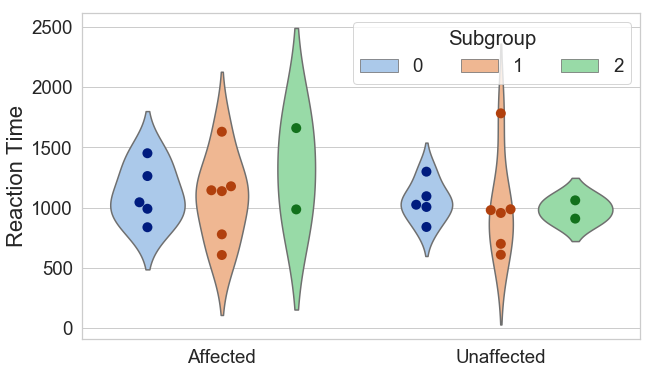

In [37]:
# Plotting Reaction Time in affected and unaffected hand according to the subgroup

sns.set(font_scale = 1.7, style="whitegrid")

light = sns.color_palette("pastel")
dark = sns.color_palette("dark")

f = plt.figure(figsize=(10,6))
f = sns.violinplot(x = 'Variable', y = 'Reaction Time', hue = 'Subgroup', data=longRT, palette=light, inner=None)
f = sns.swarmplot(x = 'Variable', y = 'Reaction Time', hue = 'Subgroup', data=longRT, palette=dark , size=10, dodge=True)
f.set_xlabel('', fontsize = 16)
f.set_ylabel('Reaction Time', fontsize = 22)
f.legend(['0','1','2'],title="Subgroup", ncol=3, loc='upper right')

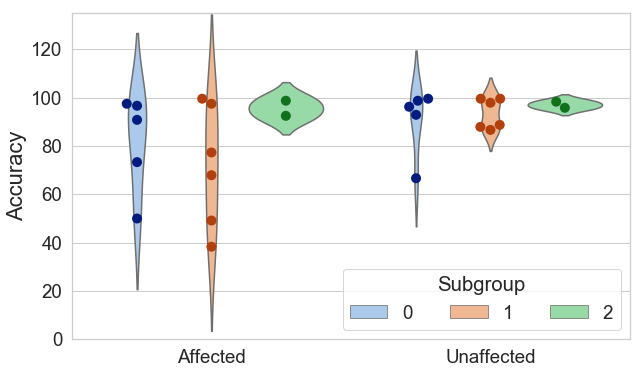

In [38]:
# Plotting Accuracy score in affected and unaffected hand according to the subgroup

sns.set(font_scale = 1.7, style="whitegrid")

f = plt.figure(figsize=(10,6))

f = sns.violinplot(x = 'Variable', y = 'Accuracy', hue = 'Subgroup', data=longacc, palette=light, inner=None)
f = sns.swarmplot(x = 'Variable', y = 'Accuracy', hue = 'Subgroup', data=longacc, palette=dark , size=10, dodge=True)
f.set_ylim(0,135)
f.set_xlabel('', fontsize = 16)
f.set_ylabel('Accuracy', fontsize = 22)
f.legend(['0','1','2'],title="Subgroup", ncol=3, loc='lower right')

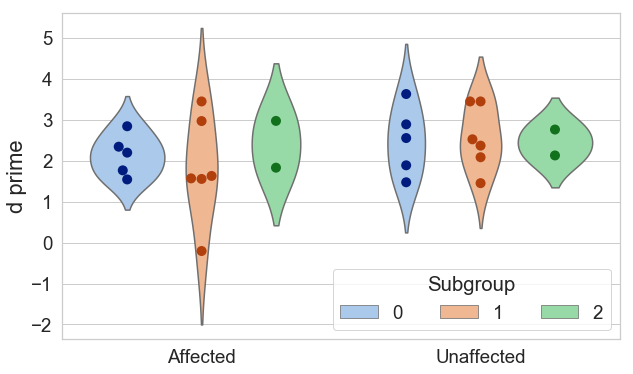

In [39]:
# Plotting d-prime scores in affected and unaffected hand according to the subgroup

sns.set(font_scale = 1.7, style="whitegrid")

f = plt.figure(figsize=(10,6))

f = sns.violinplot(x = 'Variable', y = 'd-prime', hue = 'Subgroup', data=longD, palette=light, inner=None)
f = sns.swarmplot(x = 'Variable', y = 'd-prime', hue = 'Subgroup', data=longD, palette=dark , size=10, dodge=True)
f.set_xlabel('', fontsize = 16)
f.set_ylabel('d prime', fontsize = 22)
f.legend(['0','1','2'],title="Subgroup", ncol=3, loc='lower right')

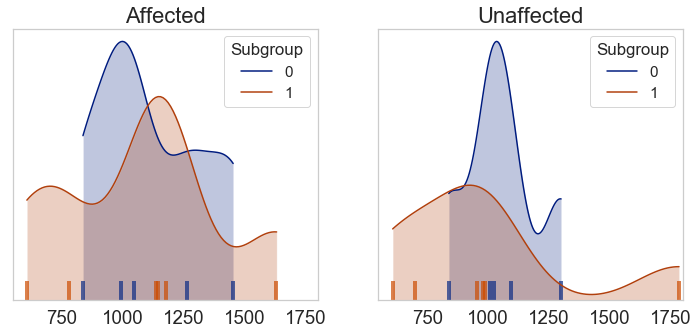

In [40]:
## Plotting Reaction Time distribution in affected and unaffected hand according to the subgroup 1 or 0

# creating subgroup division
comp = rt.loc[['P07','P13','P16','P18','P19','P20']]
nocomp = rt.loc[['P04','P10','P12','P14','P15']]
rand = rt.loc[['P08','P17']]

# style settings
sns.set(font_scale = 1.7)
sns.set_style("whitegrid", {'axes.grid' : False})

# plotting
f = plt.figure(figsize=(12,5))
gs = f.add_gridspec(1, 2)

sns.set_palette(dark)

ax1 = f.add_subplot(gs[0, 0])
ax1 = sns.kdeplot(nocomp['Affected'], shade=True, bw=.4)
ax1 = sns.distplot(nocomp['Affected'], rug=True, hist=False, kde=False, color = "#0c2c84",
                   rug_kws={"color": "#0c2c84", "alpha":0.7, "linewidth": 4, "height":0.07})
ax1 = sns.kdeplot(comp['Affected'], shade=True, bw=.4)
ax1 = sns.distplot(comp['Affected'], rug=True, hist=False, kde=False, color='#cc4c02',
                  rug_kws={"color": "#cc4c02", "alpha":0.7, "linewidth": 4, "height":0.07})
#ax1 = sns.distplot(rand['Affected'], rug=True,  hist=False)
ax1.set_title('Affected', fontsize = 22)
ax1.set_xlabel('', fontsize = 16)
ax1.set(yticklabels=[])
ax1.set_xlim(550,1800)
ax1.set_xticks([750, 1000, 1250, 1500, 1750])


ax2 = f.add_subplot(gs[0, 1])
ax2 = sns.kdeplot(nocomp['Unaffected'], shade=True, bw=.4)
ax2 = sns.distplot(nocomp['Unaffected'], rug=True, hist=False, kde=False, color = "#0c2c84",
                   rug_kws={"color": "#0c2c84", "alpha":0.7, "linewidth": 4, "height":0.07})
ax2 = sns.kdeplot(comp['Unaffected'], shade=True, bw=.4)
ax2 = sns.distplot(comp['Unaffected'], rug=True, hist=False, kde=False, color = '#cc4c02',
                  rug_kws={"color": "#cc4c02", "alpha":0.7, "linewidth": 4, "height":0.07})
#ax2 = sns.distplot(rand['Unaffected'], rug=True,  hist=False)
ax2.set_title('Unaffected', fontsize = 22)
ax2.set_xlabel('', fontsize = 16)
ax2.set(yticklabels=[])
ax2.set_xlim(550,1800)
ax2.set_xticks([750, 1000, 1250, 1500, 1750])

sns.set(font_scale = 1.4,style = "whitegrid")
ax1.legend(title='Subgroup', loc='upper right', labels=['0', '1'])
ax2.legend(title='Subgroup', loc='upper right', labels=['0', '1'])


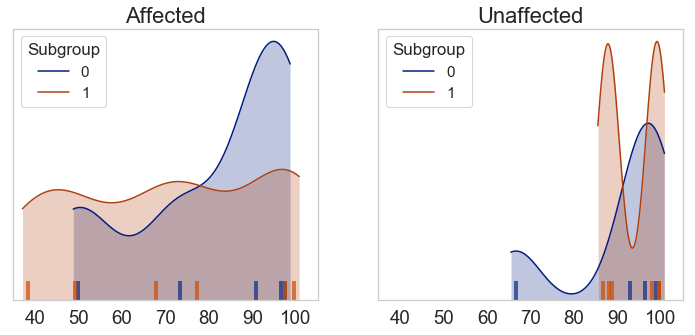

In [41]:
## Plotting Accuracy distribution in affected and unaffected hand according to the subgroup 1 or 0

# creating subgroups
comp = accuracy.loc[['P07','P13','P16','P18','P19','P20']]
nocomp = accuracy.loc[['P04','P10','P12','P14','P15']]
rand = accuracy.loc[['P08','P17']]

#style settings
sns.set(font_scale = 1.7)
sns.set_style("whitegrid", {'axes.grid' : False})

#plotting
f = plt.figure(figsize=(12,5))
gs = f.add_gridspec(1, 2)

sns.set_palette(dark)

ax1 = f.add_subplot(gs[0, 0])
ax1 = sns.kdeplot(nocomp['Affected'], shade=True, bw=.4)
ax1 = sns.distplot(nocomp['Affected'], rug=True, hist=False, kde=False, color = "#0c2c84",
                   rug_kws={"color": "#0c2c84", "alpha":0.7, "linewidth": 4, "height":0.07})
ax1 = sns.kdeplot(comp['Affected'], shade=True, bw=.4)
ax1 = sns.distplot(comp['Affected'], rug=True, hist=False, kde=False, color='#cc4c02',
                  rug_kws={"color": "#cc4c02", "alpha":0.7, "linewidth": 4, "height":0.07})
#ax1 = sns.distplot(rand['Affected'], rug=True,  hist=False)
ax1.set_title('Affected', fontsize = 22)
ax1.set_xlabel('', fontsize = 16)
ax1.set(yticklabels=[])
ax1.set_xlim(35,105)
ax1.set_xticks([40,50,60,70,80,90,100])


ax2 = f.add_subplot(gs[0, 1])
ax2 = sns.kdeplot(nocomp['Unaffected'], shade=True, bw=.4)
ax2 = sns.distplot(nocomp['Unaffected'], rug=True, hist=False, kde=False, color = "#0c2c84",
                   rug_kws={"color": "#0c2c84", "alpha":0.7, "linewidth": 4, "height":0.07})
ax2 = sns.kdeplot(comp['Unaffected'], shade=True, bw=.4)
ax2 = sns.distplot(comp['Unaffected'], rug=True, hist=False, kde=False, color = '#cc4c02',
                  rug_kws={"color": "#cc4c02", "alpha":0.7, "linewidth": 4, "height":0.07})
#ax2 = sns.distplot(rand['Unaffected'], rug=True,  hist=False)
ax2.set_title('Unaffected', fontsize = 22)
ax2.set_xlabel('', fontsize = 16)
ax2.set(yticklabels=[])
ax2.set_xlim(35,105)
ax2.set_xticks([40,50,60,70,80,90,100])

sns.set(font_scale = 1.4,style = "whitegrid")
ax1.legend(title='Subgroup', loc='upper left', labels=['0', '1'])
ax2.legend(title='Subgroup', loc='upper left', labels=['0', '1'])


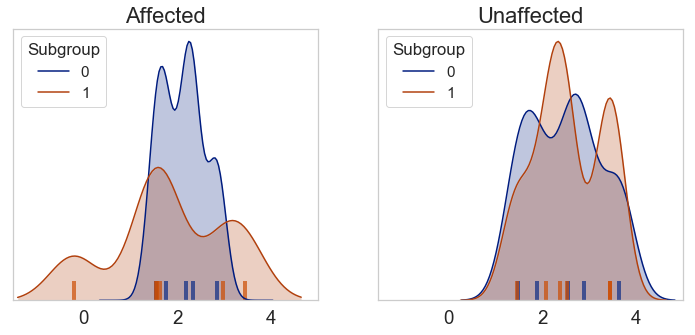

In [45]:
## Plotting d-primes distribution in affected and unaffected hand according to the subgroup 1 or 0

#creating subgroups
comp = dprimes.loc[['P07','P13','P16','P18','P19','P20']]
nocomp = dprimes.loc[['P04','P10','P12','P14','P15']]
rand = dprimes.loc[['P08','P17']]

# style settings
sns.set(font_scale = 1.7)
sns.set_style("whitegrid", {'axes.grid' : False})

# plotting
f = plt.figure(figsize=(12,5))
gs = f.add_gridspec(1, 2)

sns.set_palette(dark)

ax1 = f.add_subplot(gs[0, 0])
ax1 = sns.kdeplot(nocomp['Affected'], shade=True, bw=.4)
ax1 = sns.distplot(nocomp['Affected'], rug=True, hist=False, kde=False, color = "#0c2c84",
                   rug_kws={"color": "#0c2c84", "alpha":0.7, "linewidth": 4, "height":0.07})
ax1 = sns.kdeplot(comp['Affected'], shade=True, bw=.4)
ax1 = sns.distplot(comp['Affected'], rug=True, hist=False, kde=False, color='#cc4c02',
                  rug_kws={"color": "#cc4c02", "alpha":0.7, "linewidth": 4, "height":0.07})
#ax1 = sns.distplot(rand['Affected'], rug=True,  hist=False)
ax1.set_title('Affected', fontsize = 22)
ax1.set_xlabel('', fontsize = 16)
ax1.set(yticklabels=[])
ax1.set_xlim(-1.5,5)
#ax1.set_xticks([750, 1000, 1250, 1500, 1750])


ax2 = f.add_subplot(gs[0, 1])
ax2 = sns.kdeplot(nocomp['Unaffected'], shade=True, bw=.4)
ax2 = sns.distplot(nocomp['Unaffected'], rug=True, hist=False, kde=False, color = "#0c2c84",
                   rug_kws={"color": "#0c2c84", "alpha":0.7, "linewidth": 4, "height":0.07})
ax2 = sns.kdeplot(comp['Unaffected'], shade=True, bw=.4)
ax2 = sns.distplot(comp['Unaffected'], rug=True, hist=False, kde=False, color = '#cc4c02',
                  rug_kws={"color": "#cc4c02", "alpha":0.7, "linewidth": 4, "height":0.07})
#ax2 = sns.distplot(rand['Unaffected'], rug=True,  hist=False)
ax2.set_title('Unaffected', fontsize = 22)
ax2.set_xlabel('', fontsize = 16)
ax2.set(yticklabels=[])
ax2.set_xlim(-1.5,5)
#ax2.set_xticks([750, 1000, 1250, 1500, 1750])

sns.set(font_scale = 1.4,style = "whitegrid")
ax1.legend(title='Subgroup', loc='upper left', labels=['0', '1'])
ax2.legend(title='Subgroup', loc='upper left', labels=['0', '1'])

Text(0, 0.5, 'Area affected\n')

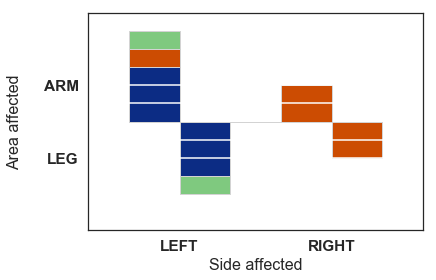

In [20]:
## Plotting Location of affected and unaffected CRPS limb (left right, upper and lower) according to the subgroups 

# style settings
sns.set_style("white")

# Values of each group
bars0 = [3, -3, 0, 0, 0]
bars1 = [1, 0, 0, 2, -2]
bars2 = [1, -1, 0, 0, 0]
line = [1,1,1,1,1]
line2 = [2,2,2,2,2]
line3 = [-1,-1,-1,-1,-1]
line4 = [-2,-2,-2,-2,-2]
 
# Heights of bars
bars = np.add(bars0, bars1).tolist()
 
# position of the bars on the x-axis
r = [0,1,2,3,4]
l = [-1,1,2,3,5]
 
# bar width
barWidth = 1
 
# Create blue bars
ax =plt.bar(r, bars0, color='#0c2c84', edgecolor='lightgrey', width=barWidth)
# Create orange bars on top of the firs ones
ax =plt.bar(r, bars1, bottom=bars0, color='#cc4c02', edgecolor='lightgrey', width=barWidth)
# Create green bars (top)
ax = plt.bar(r, bars2, bottom=bars, color='#7fc97f', edgecolor='lightgrey', width=barWidth)
ax = plt.plot(l, line,color='white')
ax = plt.plot(l, line2,color='white')
ax = plt.plot(l, line3,color='white')
ax = plt.plot(l, line4,color='white')
 
# Custom X axis
plt.xticks([0.5,3.5],['LEFT','RIGHT'], fontweight='bold')
plt.yticks([-2,2],['LEG','ARM'], fontweight='bold')
plt.ylim(-6,6)
plt.xlabel("Side affected", fontsize=16)
plt.ylabel("Area affected\n", fontsize=16)

In [21]:
# Creating the relevant dataframes for clinical variables 
clinical = pd.DataFrame()

# z-score transform of all questionnaires and disease duration
clinical['BDI'] = (d['BDI'] - d['BDI'].mean())/d['BDI'].std(ddof=0)
clinical['Functional idx'] = (d['Functional idx'] - d['Functional idx'].mean())/d['Functional idx'].std(ddof=0)
clinical['NSLQ'] = (d['NSLQ'] - d['NSLQ'].mean())/d['NSLQ'].std(ddof=0)
clinical['Depression'] = (d['Depression'] - d['Depression'].mean())/d['Depression'].std(ddof=0)
clinical['Anxiety'] = (d['Anxiety'] - d['Anxiety'].mean())/d['Anxiety'].std(ddof=0)
clinical['Disease Duration'] = (d['Duration'] - d['Duration'].mean())/d['Duration'].std(ddof=0)

# trnsform the dataframe in the long format for plotting
l = clinical.unstack().reset_index()
l["Subgroup"] = [0,1,2,0,0,1,0,0,1,2,1,1,1,0,1,2,0,0,1,0,0,1,2,1,1,1,0,1,2,0,0,1,0,0,1,2,1,1,1,
                 0,1,2,0,0,1,0,0,1,2,1,1,1,0,1,2,0,0,1,0,0,1,2,1,1,1,0,1,2,0,0,1,0,0,1,2,1,1,1]
l = l.rename(columns={"level_0": "Variable", "level_1": "Patient", 0:"z-scores"})

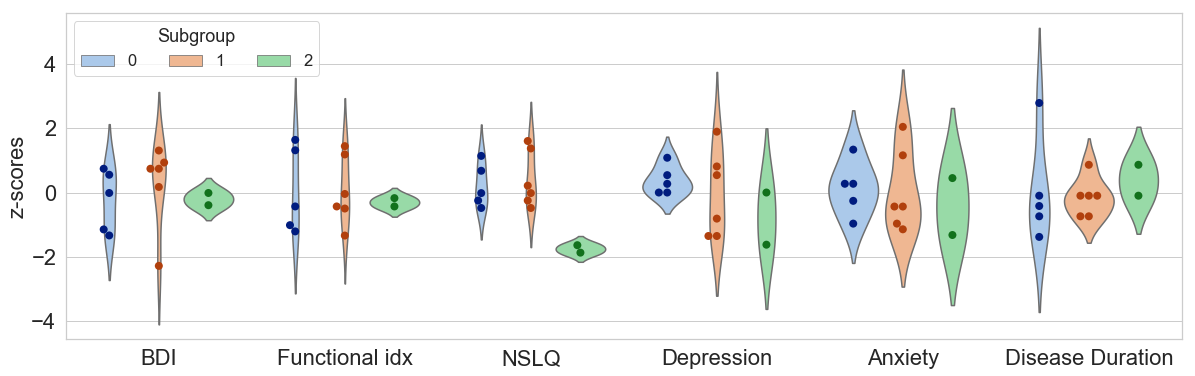

In [23]:
# style settings
sns.set(style="whitegrid")
sns.set(font_scale = 2, style="whitegrid")
light = sns.color_palette("pastel")
dark = sns.color_palette("dark")

# plotting
f = plt.figure(figsize=(20,6))

f = sns.violinplot(x = 'Variable', y = 'z-scores', hue = 'Subgroup', data=l, palette=light, inner=None)
f = sns.swarmplot(x = 'Variable', y = 'z-scores', hue = 'Subgroup', data=l, palette=dark , size=8, dodge=True)
f.set_xlabel('', fontsize = 16)
f.set_ylabel('z-scores', fontsize = 22)
sns.set(font_scale = 1.5, style="whitegrid")
f.legend(['0','1','2'],title="Subgroup", ncol=3, loc='upper left')

## HV data
h is a dataframe that contains all mean decoding performance data in healthy volunteers (in the early, mid, mid-late and late time windows), with volunteeer id as index and columns for passive right hand ("p_right"), "p_left", "a_right", "a_left" 

In [25]:
# retrieve the data
h = pd.read_cvs("HV mean decoding.csv")

In [26]:
# separate the timewindows into four different dataframes and 
# add two columns "passive" and "active" containing the difference between hands (left - right) in the respective condition.

t = ["e", "m", "ml","l"] 

for c in range(len(t)): # count 
    
    p_r = []
    p_l = []
    a_r = []
    a_l = []

    for i in range(13):
        p_r.append(h.p_right[i][c])
        p_l.append(h.p_left[i][c])
        a_r.append(h.a_right[i][c])
        a_l.append(h.a_left[i][c])
    
    globals()['%s' % t[c]] = pd.DataFrame ({"p_right":p_r,
                       "p_left": p_l,
                       "a_right":a_r,
                       "a_left":a_l},
                       index = ["H07","H08","H10","H11","H14","H16","H17","H19","H20","H21","H22","H23","H25"])


# create the two difference colums 
e['passive'] = (e['p_left'] - e['p_right'])*100
e['active'] = (e['a_left'] - e['a_right'])*100

m['passive'] = (m['p_left'] - m['p_right'])*100
m['active'] = (m['a_left'] - m['a_right'])*100

ml['passive'] = (ml['p_left'] - ml['p_right'])*100
ml['active'] = (ml['a_left'] - ml['a_right'])*100

l['passive'] = (l['p_left'] - l['p_right'])*100
l['active'] = (l['a_left'] - l['a_right'])*100

### Plotting around

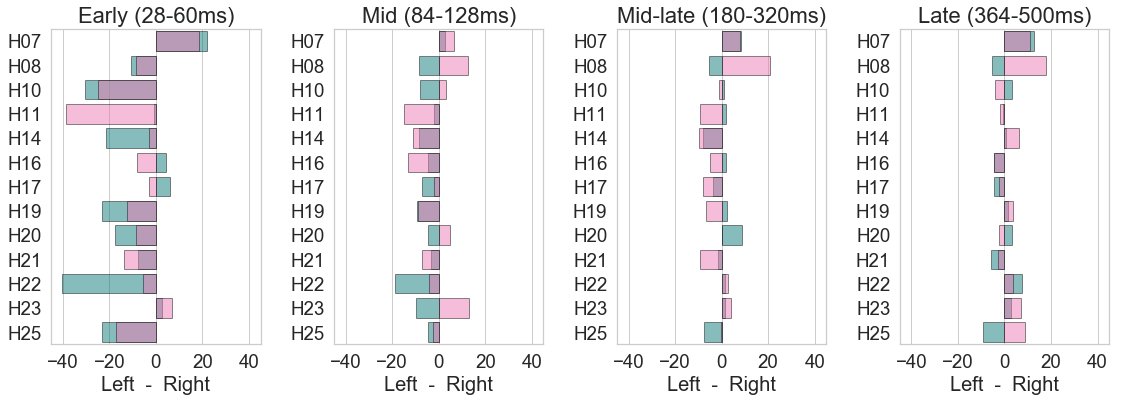

In [29]:
# create figure 4B in the CRPS paper, code is analogous as above
means = [e, m, ml, l]
title = ['Early (28-60ms)', 'Mid (84-128ms)', 'Mid-late (180-320ms)', 'Late (364-500ms)']

sns.set(font_scale = 1.7,style="whitegrid")
kwargs = {'alpha':0.5, 'linewidth':1, 'edgecolor':'k'}

f = plt.figure(figsize=(16, 6))
gs = f.add_gridspec(1, 4)

for i in range(4):
    
    ax1 = f.add_subplot(gs[0, i])
    
    p = means[i] #.sort_values(by=['passive'], ascending=False) for ordering 
    
    ax1 = sns.barplot(x = p['passive'], y= p.index, data=p, palette= ['darkcyan' ], **kwargs)
    ax1 = sns.barplot(x = p['active'], y= p.index, data=p, palette= ['hotpink'],**kwargs)
    
    ax1.set_title(title[i], fontsize = 22)  
    ax1.set_xlabel('Left  -  Right', fontsize = 20)
    ax1.set_xlim(-45,45)
    ax1.set_xticks([-40,-20, 0, 20, 40])

f.tight_layout()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


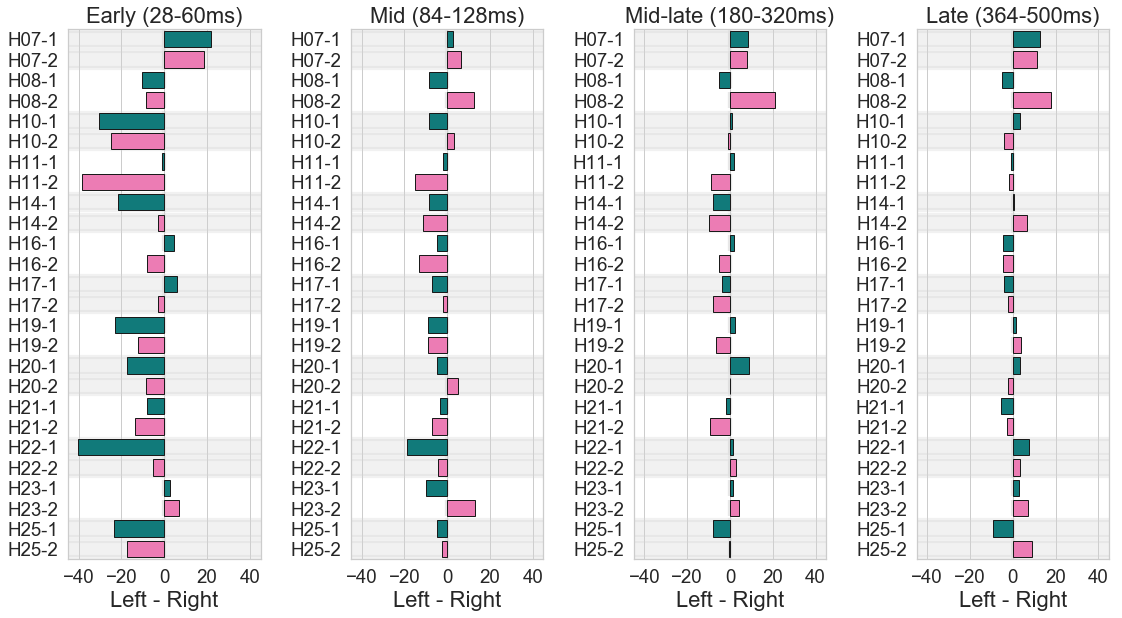

In [30]:
# same tricks and crafts for the different veriosn of figure 4 
cond = [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1]
ids = ["H07-1","H08-1","H10-1","H11-1","H14-1","H16-1","H17-1","H19-1","H20-1","H21-1","H22-1","H23-1","H25-1",
       "H07-2","H08-2","H10-2","H11-2","H14-2","H16-2","H17-2","H19-2","H20-2","H21-2","H22-2","H23-2","H25-2"]
orig =  [e, m, ml, l]
new = ['eh', 'mh', 'mlh', 'lh']

for i in range(4):
    k = pd.DataFrame()
    k['diff'] = list(pd.concat([orig[i]['passive'],orig[i]['active']]))
    k['cond'] = cond
    k['ids'] = ids
    k = k.sort_values(by=["ids", "cond"]).reset_index(drop=True)
    globals()['%s' %new[i]] = k.as_matrix()

backg = np.array([[50],[50],[0],[0],[50],[50],[0],[0],[50],[50],[0],[0],[50],[50],[0],[0],
                  [50],[50],[0],[0],[50],[50],[0],[0],[50],[50]])

newmeans = [eh, mh, mlh, lh]
title = ['Early (28-60ms)', 'Mid (84-128ms)', 'Mid-late (180-320ms)', 'Late (364-500ms)']

sns.set(font_scale = 1.7,style="whitegrid")

f = plt.figure(figsize=(16, 9))
gs = f.add_gridspec(1, 4)
kwargs = {'alpha':0.3, 'linewidth':4.2, 'edgecolor':'lightgrey'}
kwargs2 = {'alpha':1, 'linewidth':1, 'edgecolor':'k'}

for i in range(4):
    
    ax1 = f.add_subplot(gs[0, i])
    
    p = newmeans[i]
    
    clrs = ['hotpink' if (x > 0) else 'darkcyan' for x in p[:,1] ] 
    ax1 = sns.barplot(x = backg[:,0], y= p[:,2], color = 'lightgrey', **kwargs)
    ax1 = sns.barplot(x = -abs(backg[:,0]), y= p[:,2], color = 'lightgrey', **kwargs)
    ax1 = sns.barplot(x = p[:,0], y= p[:,2], palette=clrs, **kwargs2) # PuBuGn_d, vlag
    
    ax1.set_xlabel('Left - Right', fontsize = 22)
    ax1.set_ylabel('', fontsize = 14)
    ax1.set_xlim(-45,45)
    ax1.set_xticks([-40,-20, 0, 20, 40])
    
    ax1.set_title(title[i], fontsize = 22)  

f.tight_layout()

## The end :)